In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [9]:
data = pd.read_csv('Titanic-Dataset.csv')

In [10]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
data.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [18]:
data.duplicated().sum()

0

In [19]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [20]:
data.drop(columns = ['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1, inplace=True)

In [21]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [22]:
# Visualization
count_surv = data['Survived'].value_counts()
count_surv

Survived
0    549
1    342
Name: count, dtype: int64

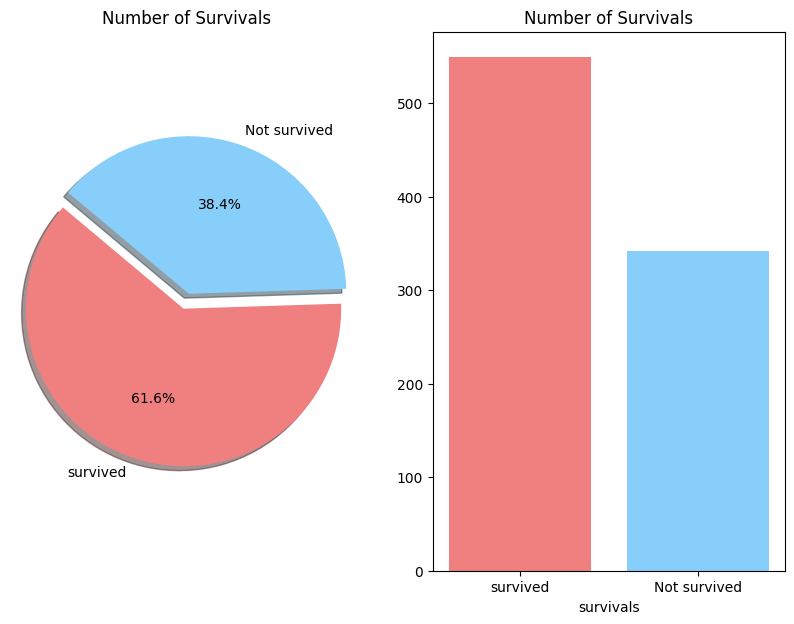

In [23]:
labels = ['survived', 'Not survived']
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0) 
sizes = count_surv

# data for bar chart
bar_labels = ['survived', 'Not survived']
bar_colors = ['lightcoral', 'lightskyblue']
bar_sizes = count_surv

#subplot
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 7))# sharex = true has x value on plot 2 only 

#plot the piechart
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow= True, startangle=140, explode=explode)
ax1.set_title('Number of Survivals')
ax1.axis('equal')

#barchart
ax2.bar(bar_labels, bar_sizes, color=bar_colors)
ax2.set_title('Number of Survivals')
ax2.set_xlabel('survivals')

# display
plt.show()

In [24]:
count_pclass = data['Pclass'].value_counts()
count_pclass

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

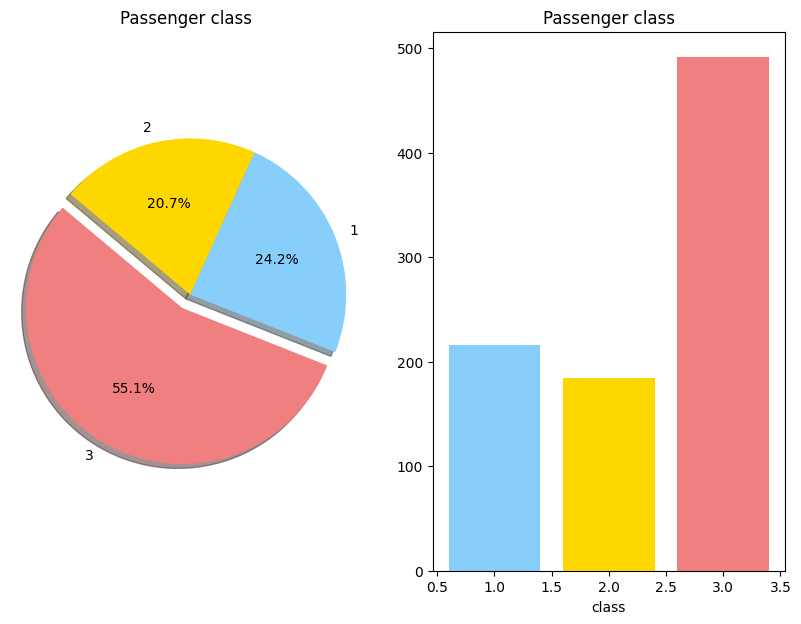

In [25]:
labels = count_pclass.index
colors = ['lightcoral', 'lightskyblue', 'gold']
explode = (0.1, 0, 0) 
sizes = count_pclass

# data for bar chart
bar_labels = count_pclass.index
bar_colors = ['lightcoral', 'lightskyblue', 'gold']
bar_sizes = count_pclass

#subplot
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 7))
#width = plt.xticks(np.arange(1, len(data) + 1))


#plot the piechart
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow= True, startangle=140, explode=explode)
ax1.set_title('Passenger class')
ax1.axis('equal')

#barchart
ax2.bar(bar_labels, bar_sizes, color=bar_colors)
ax2.set_title('Passenger class')
ax2.set_xlabel('class')
# display
plt.show()

<Axes: xlabel='Pclass', ylabel='count'>

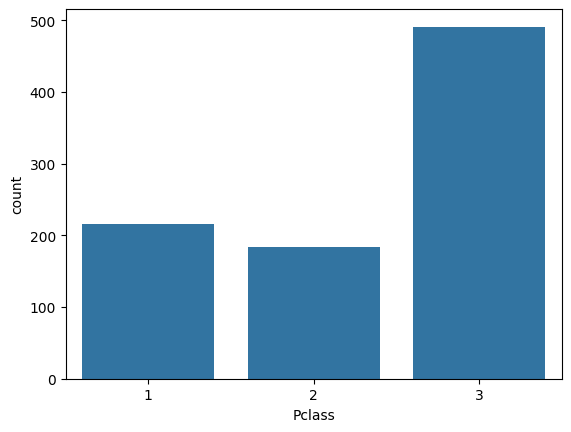

In [26]:
sns.countplot(data, x = 'Pclass')

In [27]:
count_sex = data['Sex'].value_counts()
count_sex

Sex
male      577
female    314
Name: count, dtype: int64

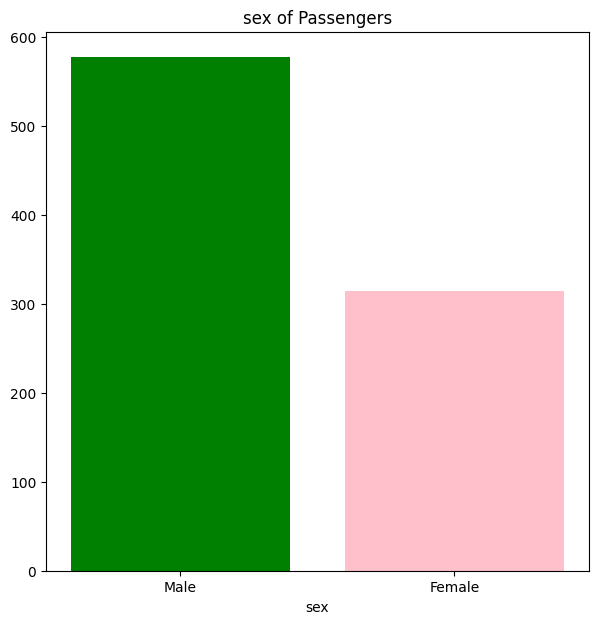

In [28]:
#subplot
f, (ax1) = plt.subplots(1, figsize = (7, 7))

labels = ['Male', 'Female']
colors = ['Green', 'pink'] 
sizes = count_sex

# data for bar chart
bar_labels = ['Male', 'Female']
bar_colors = ['Green', 'pink']
bar_sizes = count_sex


#barchart
ax1.bar(bar_labels, bar_sizes, color=bar_colors)
ax1.set_title('sex of Passengers')
ax1.set_xlabel('sex')

# display
plt.show()

In [29]:
count_sex=data['Age'].value_counts().head()
count_sex

Age
24.0    30
22.0    27
18.0    26
19.0    25
28.0    25
Name: count, dtype: int64

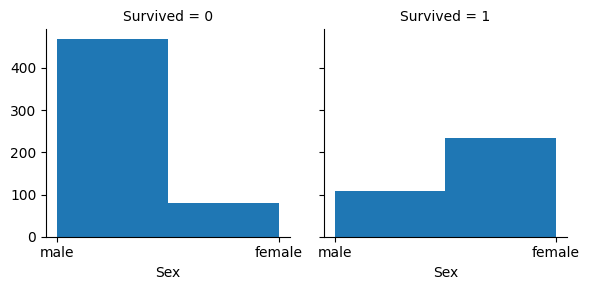

In [30]:
sex=sns.FacetGrid(data,col='Survived')
sex.map(plt.hist,'Sex',bins=2)

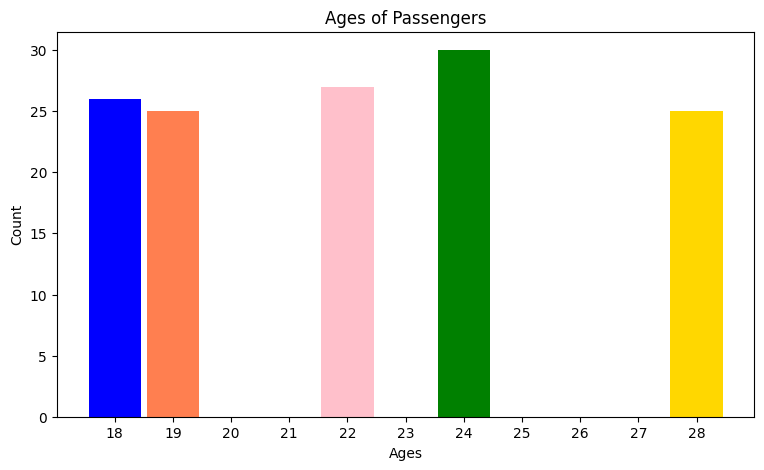

In [31]:
#subplot
f, (ax1) = plt.subplots(1, figsize = (9,5))

labels = count_sex
colors = ['Green', 'pink', 'blue', 'coral', 'gold'] 
sizes = count_sex.index
plt.xticks(np.arange(1, len(data) + 1))

# data for bar chart
bar_labels = count_sex.index
bar_colors = ['Green', 'pink', 'blue', 'coral', 'gold']
bar_sizes = count_sex
width = 0.9


#barchart
ax1.bar(bar_labels, bar_sizes, color=bar_colors, width=width)
ax1.set_title('Ages of Passengers')
ax1.set_xlabel('Ages')
ax1.set_ylabel('Count')

# display
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_8568\3343151649.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_sex.index, y=count_sex, palette='plasma')


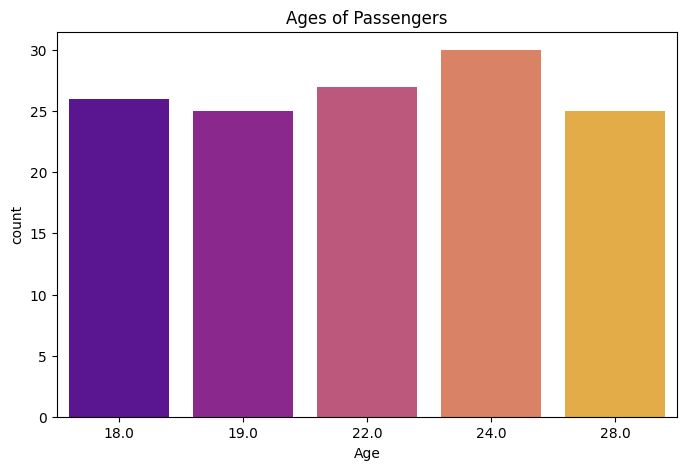

In [32]:
count_sex = data['Age'].value_counts().head()
count_sex

plt.figure(figsize=(8,5))
sns.barplot(x=count_sex.index, y=count_sex, palette='plasma')
plt.title('Ages of Passengers')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

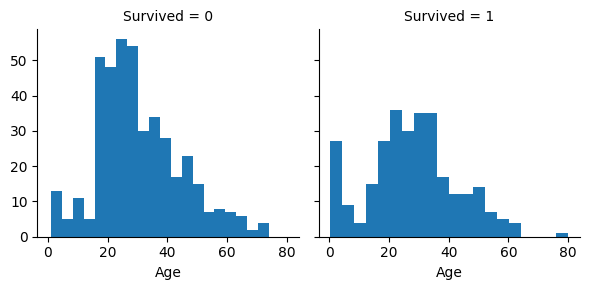

In [33]:
age=sns.FacetGrid(data,col='Survived')
age.map(plt.hist,'Age',bins=20)

C:\Users\USER\AppData\Local\Temp\ipykernel_8568\1863276383.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_sib.index, y=count_sib, palette='plasma')


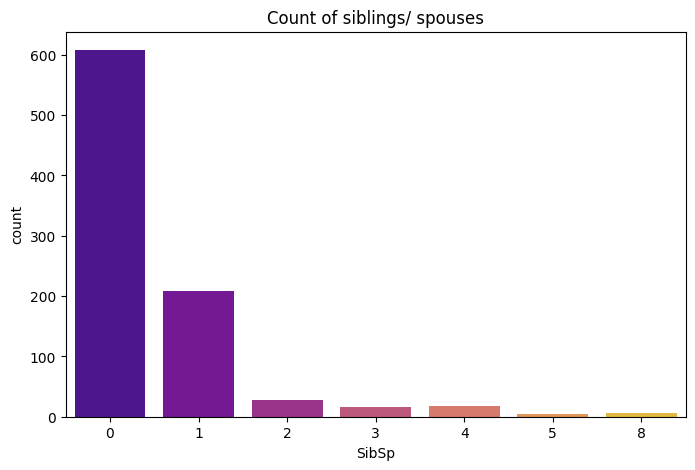

In [34]:
count_sib = data['SibSp'].value_counts()
count_sib

plt.figure(figsize=(8,5))
sns.barplot(x=count_sib.index, y=count_sib, palette='plasma')
plt.title('Count of siblings/ spouses')
plt.xlabel('SibSp')
plt.ylabel('count')
plt.show()

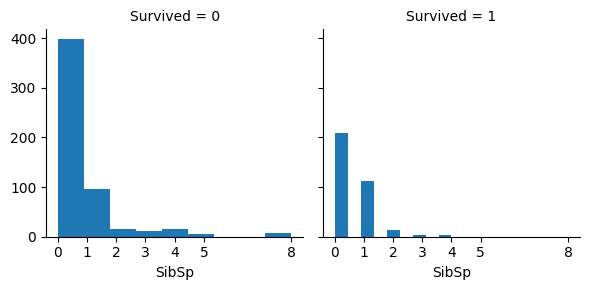

In [35]:
sib=sns.FacetGrid(data,col='Survived')
plt.xticks(count_sib.index)
sib.map(plt.hist,'SibSp',bins=9)

In [36]:
count_parch = data['Parch'].value_counts()
count_parch

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

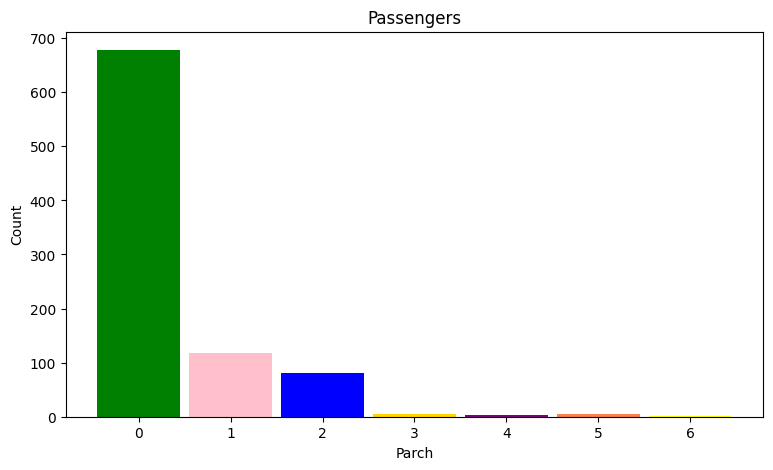

In [37]:
f, (ax1) = plt.subplots(1, figsize = (9,5))

labels = count_parch
color = ['Green', 'pink', 'blue', 'coral', 'gold', 'purple', 'yellow']
sizes = count_parch.index
#plt.xticks(np.arange(1, len(data) + 1))

# data for bar chart
bar_labels = count_parch.index
bar_colors = ['Green', 'pink', 'blue', 'coral', 'gold', 'purple', 'yellow']
bar_sizes = count_parch
width = 0.9


#barchart
ax1.bar(bar_labels, bar_sizes, color=bar_colors, width=width)
ax1.set_title('Passengers')
ax1.set_xlabel('Parch')
ax1.set_ylabel('Count')

# display
plt.show()

In [38]:
count_fare = data['Fare'].value_counts().head(7)
count_fare

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
10.5000    24
7.9250     18
Name: count, dtype: int64

C:\Users\USER\AppData\Local\Temp\ipykernel_8568\3823338408.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_fare.index, y=count_fare, palette='plasma')


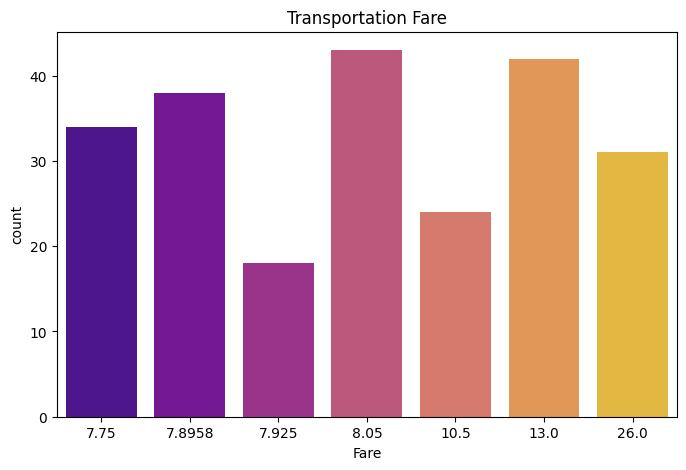

In [39]:

plt.figure(figsize=(8,5))
sns.barplot(x=count_fare.index, y=count_fare, palette='plasma')
plt.title('Transportation Fare')
plt.xlabel('Fare')
plt.ylabel('count')
plt.show()

In [40]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [41]:
count_emb = data['Embarked'].value_counts()
count_emb

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

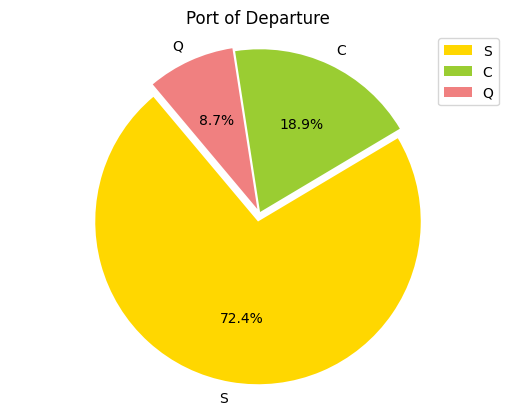

In [42]:
labels = count_emb.index
sizes = count_emb
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.05, 0.01, 0.03)

# ploting the pie chart
plt.pie(sizes, labels=labels, explode=explode, colors=colors, autopct='%1.1f%%', startangle=130)

#adding a title
plt.title('Port of Departure')

# egual aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.legend(labels)

# display the pie chart
plt.show()

In [43]:
# filling missing values
data['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [44]:
data['Age'].median()

28.0

In [45]:
data['Age'].fillna(data['Age'].median(), inplace=True)

print(data['Age'].value_counts)
data.isna().sum()

<bound method IndexOpsMixin.value_counts of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64>


C:\Users\USER\AppData\Local\Temp\ipykernel_8568\2680626950.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [46]:
data['Embarked'].mode()[0]

'S'

In [47]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data.isna().sum()

C:\Users\USER\AppData\Local\Temp\ipykernel_8568\2121382460.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [48]:
data['Embarked'].value_counts

<bound method IndexOpsMixin.value_counts of 0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object>

In [49]:
data['Sex'] = data['Sex'].replace({'male': 1, 'female': 0})
data

C:\Users\USER\AppData\Local\Temp\ipykernel_8568\581347006.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Sex'] = data['Sex'].replace({'male': 1, 'female': 0})


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S
887,1,1,0,19.0,0,0,30.0000,S
888,0,3,0,28.0,1,2,23.4500,S
889,1,1,1,26.0,0,0,30.0000,C


In [50]:
data['Embarked'] = data['Embarked'].replace({'S': 1, 'C': 2, 'Q': 3})
data

C:\Users\USER\AppData\Local\Temp\ipykernel_8568\2826340714.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Embarked'] = data['Embarked'].replace({'S': 1, 'C': 2, 'Q': 3})


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,2
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,1
887,1,1,0,19.0,0,0,30.0000,1
888,0,3,0,28.0,1,2,23.4500,1
889,1,1,1,26.0,0,0,30.0000,2


In [51]:
data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.045702
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,-0.116569
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.009165
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,-0.059961
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,-0.078665
Fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,0.062142
Embarked,0.106811,0.045702,-0.116569,-0.009165,-0.059961,-0.078665,0.062142,1.000000


Axes(0.125,0.11;0.62x0.77)


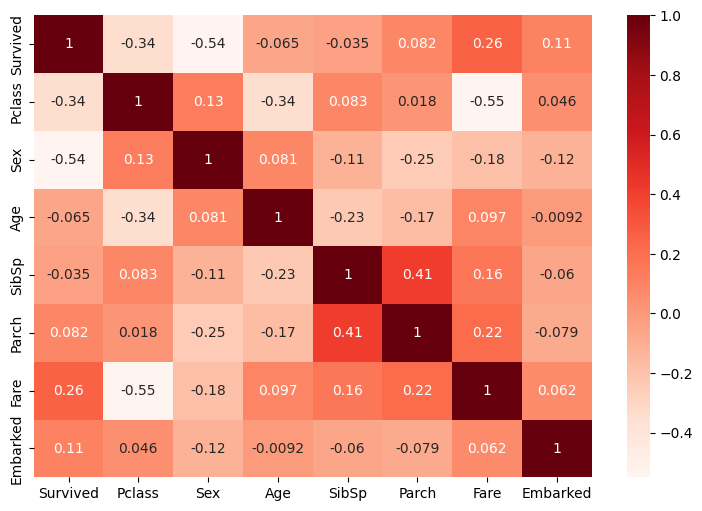

In [52]:
plt.figure(figsize = (9,6))
data_corr = data.corr()
heat_map = sns.heatmap(data_corr, annot = True, cmap = 'Reds')
print(heat_map)

In [66]:
# modelling

X = data.drop('Survived', axis = 1)
y = data['Survived']

In [67]:
# splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [68]:
# feature scaling 

# Initializng the scaler
scaler = StandardScaler()

# Fitting and transforming  training data
# transforming test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [69]:
#Define and train the logistic regression model

# Initialize the model
model = LogisticRegression()  

# Train the model
model.fit(X_train_scaled, y_train)  

LogisticRegression()

In [72]:
# evaluating the model
y_pred = model.predict(X_test_scaled)

# Evaluate the model's performance
accuracy1 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7988826815642458
Confusion Matrix:
 [[89 16]
 [20 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



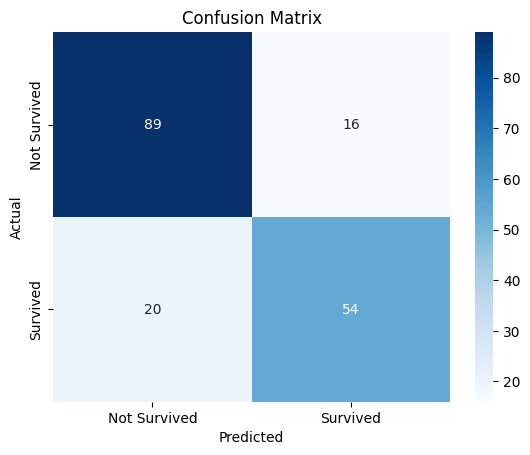

In [71]:
# plotting confusion matrix for better visualization


sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

From the above:

89 passengers who did not survive and were correctly predicted as not surviving.
16 passengers who did not survive but were incorrectly predicted to have survived.
20 passengers who survived but were incorrectly predicted as not surviving.
54 passengers who survived and were correctly predicted as surviving.

The confusion matrix, gives a clearer visual overview of the performance of your model

2) Random Forest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier


In [60]:
# training the model
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)

RandomForestClassifier()

In [74]:
#making predictions
RF_y_pred = RF_model.predict(X_test)


accuracy2 = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy_score(y_test, RF_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, RF_y_pred))
print("Classification Report:\n", classification_report(y_test, RF_y_pred))

Random Forest Accuracy: 0.8212290502793296
Confusion Matrix:
 [[90 15]
 [17 57]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



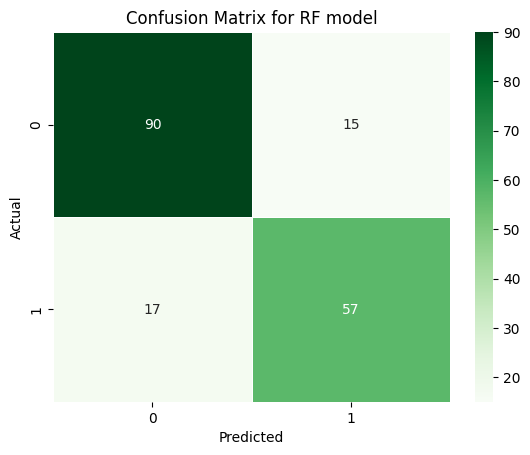

In [75]:
# confusion matrix plot

sns.heatmap(confusion_matrix(y_test, RF_y_pred), annot=True, fmt='d', cmap='Greens', linewidth = 0.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for RF model')
plt.show()

90 passengers who did not survive and were correctly predicted as not surviving.
15 passengers who did not survive but were incorrectly predicted to have survived.
17 passengers who survived but were incorrectly predicted as not surviving.
57 passengers who survived and were correctly predicted as surviving.


3) K Nearest Neighbours

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [77]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [78]:
y_pred_knn = model_knn.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred)
print("Accuracy For KNN:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

Accuracy For KNN: 0.7150837988826816
Confusion Matrix:
 [[89 16]
 [35 39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.85      0.78       105
           1       0.71      0.53      0.60        74

    accuracy                           0.72       179
   macro avg       0.71      0.69      0.69       179
weighted avg       0.71      0.72      0.71       179



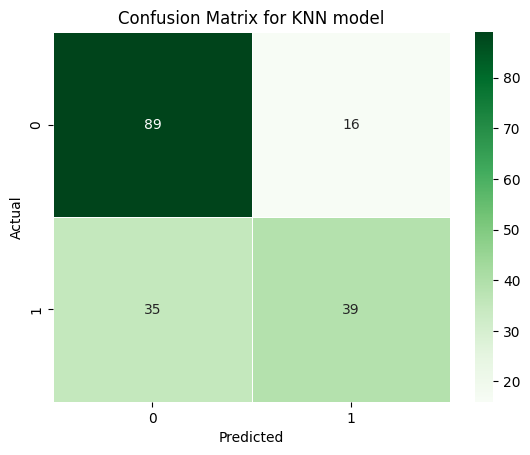

In [79]:
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Greens', linewidth = 0.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN model')
plt.show()

4) Support Vector Machine

In [81]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [82]:
#Train a SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [84]:
# model predictions
svm_y_pred = svm_model.predict(X_test)

accuracy4 = accuracy_score(y_test, y_pred)
print("Accuracy For SVM:", accuracy_score(y_test, svm_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_y_pred))
print("Classification Report:\n", classification_report(y_test, svm_y_pred))

Accuracy For SVM: 0.6536312849162011
Confusion Matrix:
 [[99  6]
 [56 18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.94      0.76       105
           1       0.75      0.24      0.37        74

    accuracy                           0.65       179
   macro avg       0.69      0.59      0.56       179
weighted avg       0.68      0.65      0.60       179



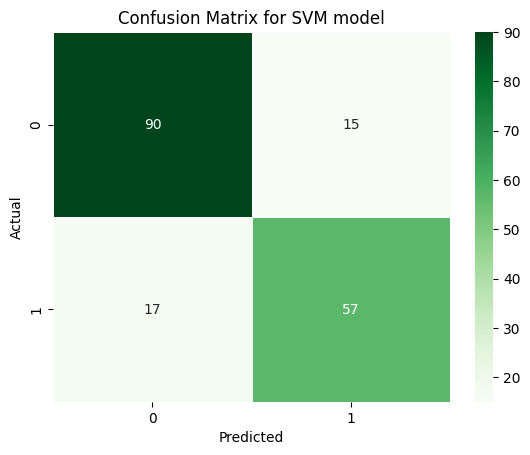

In [85]:
sns.heatmap(confusion_matrix(y_test, RF_y_pred), annot=True, fmt='d', cmap='Greens', linewidth = 0.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM model')
plt.show()

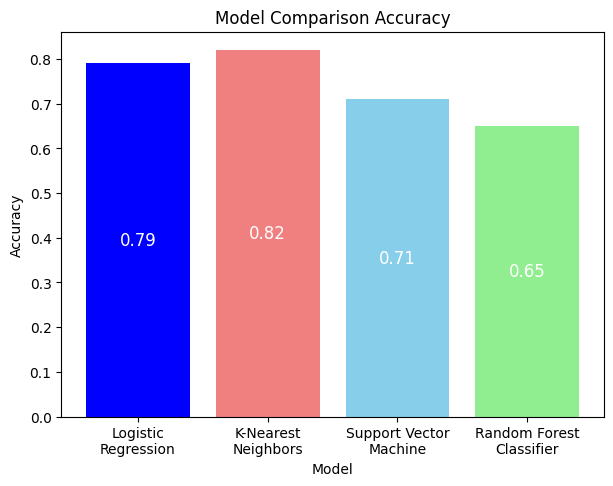

In [86]:
# Accuracy score for corresponding model
accuracy1 = 0.79  # Logistic Regression Accuracy
accuracy2 = 0.82  # K-Nearest Neighbors Accuracy
accuracy3 = 0.71  # Support Vector Machine Accuracy
accuracy4 = 0.65  # Random Forest Classifier Accuracy


model_names = ["Logistic\nRegression", "K-Nearest\nNeighbors", "Support Vector\nMachine", "Random Forest\nClassifier"]


model_scores = [accuracy1, accuracy2, accuracy3, accuracy4]

# Create the bar plot
fig, ax = plt.subplots(figsize=(7, 5))
bars = ax.bar(model_names, model_scores, color=['blue', 'lightcoral', 'skyblue', 'lightgreen'])  # Different colors for each model

# labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Model Comparison Accuracy')

# Display the accuracy values in the middle of the bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    
    # Position the text in the middle of the bar 
    ax.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{height:.2f}', ha='center', va='center', fontsize=12, color='white')


plt.show()


KNN has the highest accuracy (0.82) as compared to the accuracy of the other models.